In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [2]:
%%time
# ###Run with input date
# import requests
# import os
# from datetime import datetime, timedelta
# import time
# #url = 'http://10.224.18.77:8000/predict'
# #url = 'http://10.224.18.117:8001/predict'

# # API endpoint
# url = "http://127.0.0.1:8000/predict"
# t0 = datetime(2023, 12, 8, 6, 0)
# t0 = t0.strftime('%Y-%m-%d %H:%M:%S')

# # Input data as JSON
# input_data = {
#     "t0": t0 # Example of passing a string value for t0
# }
# # Sending a POST request
# response = requests.post(url, json=input_data)
# out  = response.json()
# output_ml1 = out["Prediction Output ML1"]
# output_ml2 = out["Prediction Output ML2"]

### Run without input date
import requests
import os
from datetime import datetime, timedelta
import time

# API endpoint
url = 'http://10.224.18.77:8001/predict'

# Sending a POST request
response = requests.post(url)
out  = response.json()
output_ml1 = out["Prediction Output ML1"]
output_ml2 = out["Prediction Output ML2"]

KeyboardInterrupt: 

dict_keys(['Prediction Time Start', 'Prediction Time Finished', 'precip information', 'precip source', 'precip date', 'Prediction Output ML1', 'Prediction Output ML2'])

In [3]:
# import json
# # Specify the file path and name
# file_path = "../Data/Output EWS flood banjir.json"

# # Open the file in write mode and dump the dictionary as JSON
# with open(file_path, 'w') as json_file:
#     json.dump(out, json_file, indent=4)

In [4]:
print(out['precip source'])

['pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'no data', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'gsmap', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'gsmap', 'gsmap', 'gsmap', 'gsmap', 'gsmap', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'gsmap', 'gsmap', 'gsmap', 'gsmap', 'gsmap', 'gsmap', 'no data', 'no data', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr', 'pupr']


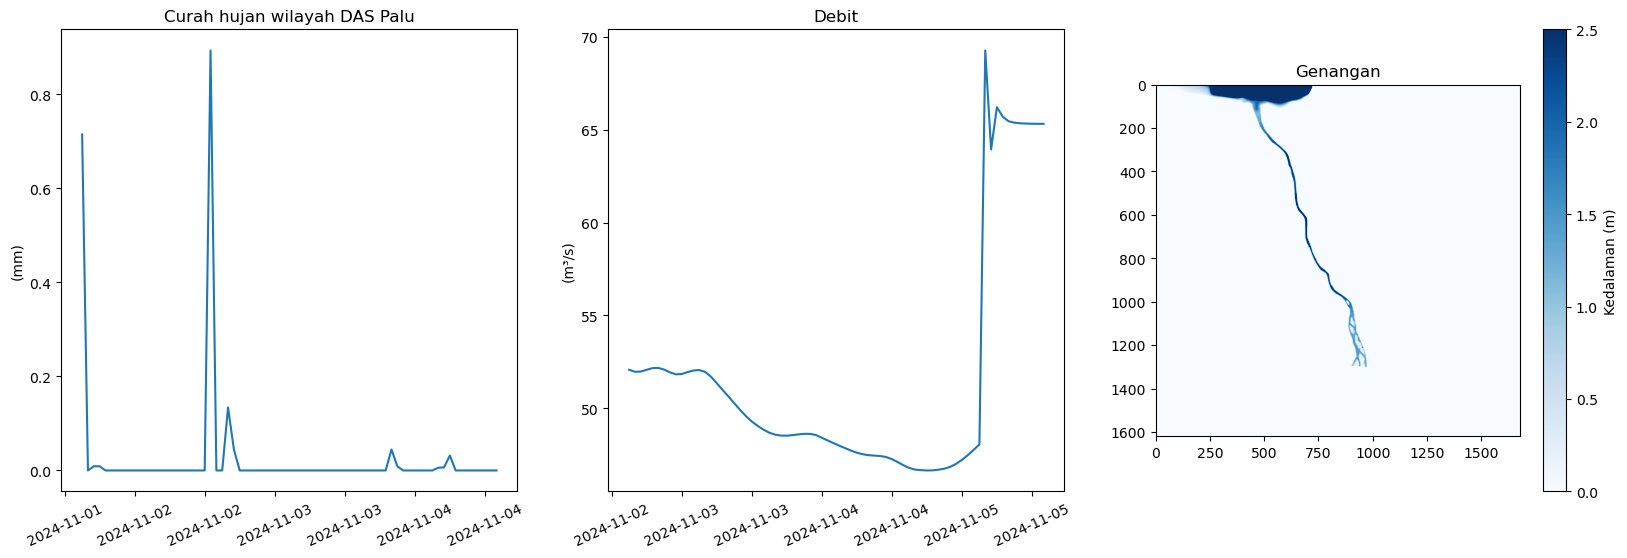

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd  # Ensure you have imported pandas
len_data_prec = 72

# Convert your data to numpy arrays (assuming output_ml1 and output_ml2 contain the necessary data)
debit = np.array(output_ml1['debit value'])
precipitation = np.array(output_ml1['precipitation value'])
depth = np.array(output_ml2['inundation'])

# Convert dates to datetime if they're not already
# Assuming your dates are in a string format like "YYYY-MM-DD", you can use pd.to_datetime()
dates = pd.to_datetime(output_ml1['debit dates'])  # Convert the dates to datetime objects
date_prec = pd.to_datetime(out['precip date'])
# Create a figure with subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot the first image in the first subplot
axes[0].plot(date_prec,precipitation)
axes[0].set_title("Curah hujan wilayah DAS Palu")
axes[0].set_ylabel("(mm)")

# Format x-axis as date and rotate the labels for better readability
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=25)

# Plot the second image in the second subplot, with the x-axis showing dates
axes[1].plot(dates, debit)
axes[1].set_title("Debit")
axes[1].set_ylabel("(m³/s)")

# Format x-axis as date and rotate the labels for better readability
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[1].xaxis.set_major_locator(mdates.AutoDateLocator())
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=25)

# Plot the third image in the second subplot with improved visualization
im = axes[2].imshow(depth, cmap='Blues', interpolation='bilinear')  # Apply colormap and interpolation
axes[2].set_title("Genangan")
cbar = fig.colorbar(im, ax=axes[2])
cbar.set_label('Kedalaman (m)')

# Optionally, set limits for the color bar to enhance contrast
im.set_clim(0, 2.5)  # Adjust the color bar to fit the range of depth values

# Show the plot
plt.show()